In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score
from tensorflow.keras import optimizers
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 
from datetime import datetime
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score

In [ ]:
models = [tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Second semester/Models/NN/local/device/device1'),tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Second semester/Models/NN/local/device/device2'),tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Second semester/Models/NN/local/device/device3'),tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Second semester/Models/NN/local/device/device4')]

In [ ]:
test_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Second semester/Data/label_split/test.csv')

In [ ]:
test_data.pop('Unnamed: 0')
#test_data.pop('Unnamed: 0.1')

In [ ]:
test_data

In [ ]:
test_data['subcategory'].value_counts(dropna=False)

In [ ]:
test_stats = test_data.describe()
test_stats.pop("subcategory")
test_stats = test_stats.transpose()

In [ ]:
test_labels1 = test_data.pop('subcategory')

In [ ]:
test_labels = pd.get_dummies(test_labels1, prefix='Label')

In [ ]:
def norm(x):
    return (x - test_stats['min']) / (test_stats['max']-test_stats['min'])
normed_test_data = norm(test_data)

In [ ]:
normed_test_data

In [ ]:
test_labels

In [ ]:
new_weights = []
for layer_weights in zip(*[model.get_weights() for model in models]):
    new_weights.append(np.array(layer_weights).mean(axis=0))

In [ ]:
new_model = Sequential()
new_model.add(Dense(16, input_shape = (normed_test_data.shape[1],)))         
new_model.add(Dense(test_labels.shape[1], activation='softmax'))                         
learning_rate = 0.0001
optimizer = optimizers.Adam(learning_rate)
#new_model = tf.keras.models.clone_model(models[0])
new_model.compile(loss='categorical_crossentropy',#from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy']) 
new_model.set_weights(new_weights)

In [ ]:
predict_results = new_model.predict(normed_test_data)
predict_results= predict_results.argmax(axis = 1)

22872/22872 [==============================] - 42s 2ms/step


In [ ]:
predict_results

In [ ]:
results = new_model.evaluate(normed_test_data, test_labels, batch_size=128)

5718/5718 [==============================] - 13s 2ms/step - loss: 1.9761 - accuracy: 0.1788


In [ ]:
test_labels1

In [ ]:
sk_report = classification_report(y_true=test_labels1,y_pred=predict_results,digits=4)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
sk_report

'              precision    recall  f1-score   support\n\n           0     0.0000    0.0000    0.0000        94\n           1     0.0000    0.0000    0.0000       216\n           2     0.0000    0.0000    0.0000    189523\n           3     0.0000    0.0000    0.0000    196071\n           4     0.0000    0.0000    0.0000       297\n           5     0.0000    0.0000    0.0000    206492\n           6     0.1717    1.0000    0.2931    122880\n           7     0.0000    0.0000    0.0000      3643\n           8     0.9883    0.6274    0.7676     12663\n\n    accuracy                         0.1788    731879\n   macro avg     0.1289    0.1808    0.1179    731879\nweighted avg     0.0459    0.1788    0.0625    731879\n'

In [ ]:
tf.keras.models.save_model(new_model, '/content/drive/MyDrive/Colab Notebooks/Second semester/Models/NN/global/device/global_model')

In [ ]:
new_model=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Second semester/Models/NN/global/random/global_model')
predict_results = new_model.predict(normed_test_data)
predict_results= predict_results.argmax(axis = 1)

22872/22872 [==============================] - 43s 2ms/step


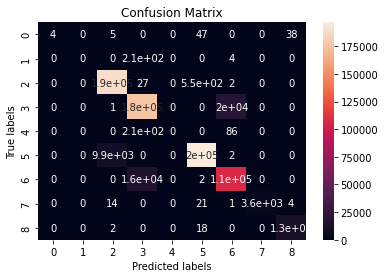

In [ ]:
#confusion matrix
ax= plt.subplot()
cm = confusion_matrix(test_labels1, predict_results)
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 